In [4]:
import tensorflow as tf

x = tf.constant([[1., 2., 3.],
                 [4., 5., 6.]])

print(x)
print(x.shape)
print(x.dtype)

tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)
(2, 3)
<dtype: 'float32'>


In [5]:
x + x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [6]:
5 * x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 5., 10., 15.],
       [20., 25., 30.]], dtype=float32)>

In [7]:
x @ tf.transpose(x)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [8]:
tf.concat([x, x, x], axis=0)

<tf.Tensor: shape=(6, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.],
       [1., 2., 3.],
       [4., 5., 6.],
       [1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [9]:
tf.nn.softmax(x, axis=-1)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.09003057, 0.24472848, 0.6652409 ],
       [0.09003057, 0.24472848, 0.6652409 ]], dtype=float32)>

In [10]:
tf.reduce_sum(x)

<tf.Tensor: shape=(), dtype=float32, numpy=21.0>

In [11]:
tf.convert_to_tensor([1, 2, 3])

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3], dtype=int32)>

In [12]:
tf.reduce_sum([1, 2, 3])

<tf.Tensor: shape=(), dtype=int32, numpy=6>

In [13]:
if tf.config.list_physical_devices('GPU'):
    print("Tensorflow **IS** using GPU")
else:
    print("Tensorflow **IS NOT** using GPU")

Tensorflow **IS NOT** using GPU


In [14]:
# variables

var = tf.Variable([0.0, 0.0, 0.0])

In [15]:
var.assign([1, 2, 3])

<tf.Variable 'UnreadVariable' shape=(3,) dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [16]:
var.assign_add([1, 1, 1])

<tf.Variable 'UnreadVariable' shape=(3,) dtype=float32, numpy=array([2., 3., 4.], dtype=float32)>

In [17]:
# Automatic differentiation

x = tf.Variable(1.0)

def f(x):
  y = x**2 + 2*x - 5
  return y

In [18]:
f(x)

<tf.Tensor: shape=(), dtype=float32, numpy=-2.0>

In [19]:
with tf.GradientTape() as tape:
  y = f(x)

g_x = tape.gradient(y, x)  # g(x) = dy/dx

g_x

<tf.Tensor: shape=(), dtype=float32, numpy=4.0>

In [20]:
# Graphs n tf.function

@tf.function
def my_func(x):
    print('Tracing.\n')
    return tf.reduce_sum(x)

In [21]:
x = tf.constant([1, 2, 3])
my_func(x)

Tracing.



<tf.Tensor: shape=(), dtype=int32, numpy=6>

In [22]:
x = tf.constant([10, 9, 8])
my_func(x)

<tf.Tensor: shape=(), dtype=int32, numpy=27>

In [23]:
x = tf.constant([10.0, 9.1, 8.2], dtype=tf.float32)
my_func(x)

Tracing.



<tf.Tensor: shape=(), dtype=float32, numpy=27.299999237060547>

In [24]:
# Modules, layers, and models

class MyModule(tf.Module):
    def __init__(self, value):
        self.weight = tf.Variable(value)

    @tf.function
    def multiply(self, x):
        return x * self.weight

In [25]:
mod = MyModule(3)
mod.multiply(tf.constant([1, 2, 3]))

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 6, 9], dtype=int32)>

In [26]:
# Save Module

save_path = './saved'
tf.saved_model.save(mod, save_path)

INFO:tensorflow:Assets written to: ./saved\assets


INFO:tensorflow:Assets written to: ./saved\assets


In [30]:
reloaded = tf.saved_model.load(save_path)
reloaded.multiply(tf.constant([1, 2, 3]))

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 6, 9], dtype=int32)>

In [31]:
# Training Loops

import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams['figure.figsize'] = [9, 6]

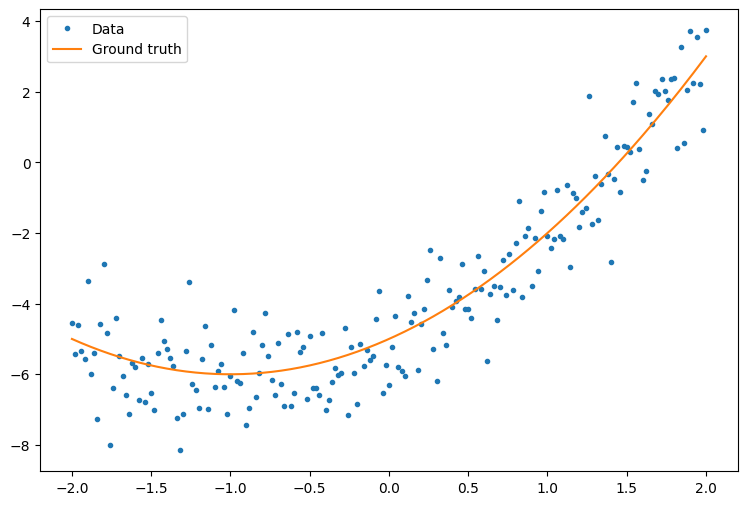

In [32]:
x = tf.linspace(-2, 2, 201)
x = tf.cast(x, tf.float32)

def f(x):
    y = x**2 + 2*x - 5
    return y

y = f(x) + tf.random.normal(shape=[201])

plt.plot(x.numpy(), y.numpy(), '.', label='Data')
plt.plot(x, f(x), label='Ground truth')
plt.legend()

In [34]:
class Model(tf.Module):
    def __init__(self):
        rand_init = tf.random.uniform(shape=[3], minval=0., maxval=5., seed=22)
        self.w_q = tf.Variable(rand_init[0])
        self.w_l = tf.Variable(rand_init[1])
        self.b = tf.Variable(rand_init[2])

    @tf.function
    def __call__(self, x):
        return self.w_q * (x**2) + self.w_l * x + self.b

In [35]:
quad_model = Model()

In [37]:
def plot_preds(x, y, f, model, title):
    plt.figure()
    plt.plot(x, y, '.', label = 'Data')
    plt.plot(x, f(x), label='Ground truth')
    plt.plot(x, model(x), label='Predictions')
    plt.title(title)
    plt.legend()

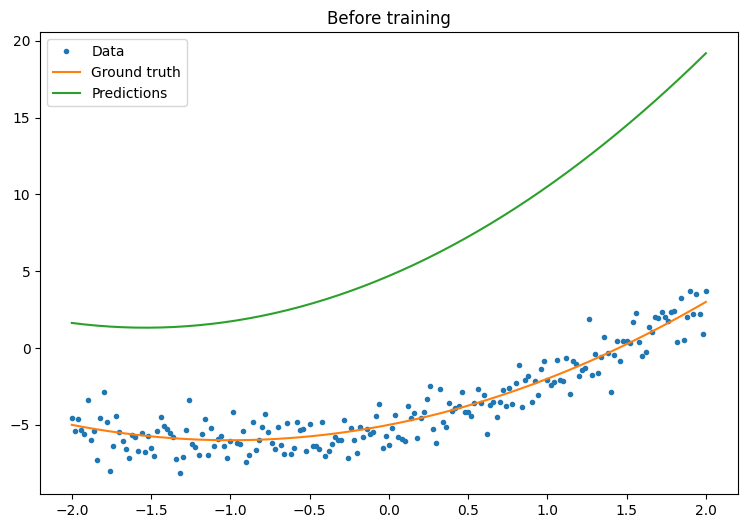

In [38]:
plot_preds(x, y, f, quad_model, 'Before training')

In [39]:
def mse_loss(y_pred, y):
    return tf.reduce_mean(tf.square(y_pred - y))

In [40]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices((x, y))
dataset = dataset.shuffle(buffer_size=x.shape[0]).batch(batch_size)

Mean squared error for step 0: 56.204
Mean squared error for step 10: 10.043
Mean squared error for step 20: 4.067
Mean squared error for step 30: 2.018
Mean squared error for step 40: 1.301
Mean squared error for step 50: 1.058
Mean squared error for step 60: 0.972
Mean squared error for step 70: 0.937
Mean squared error for step 80: 0.927
Mean squared error for step 90: 0.923




Text(0.5, 1.0, 'MSE loss vs training iterations')

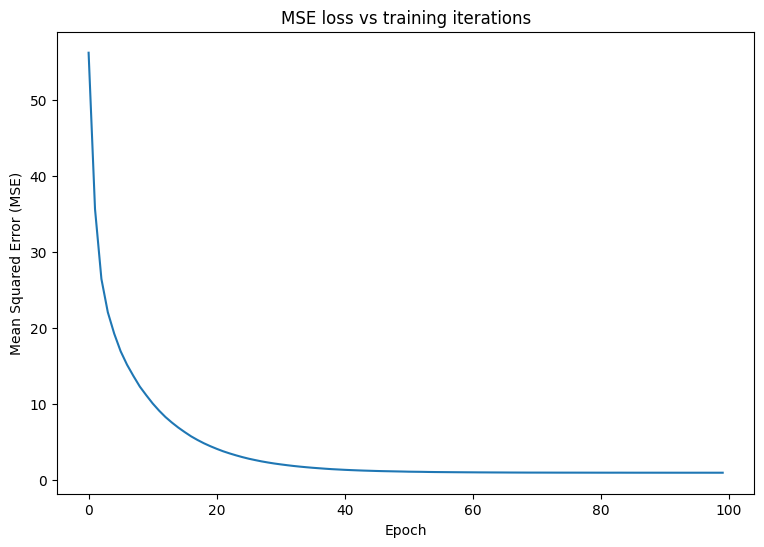

In [41]:
epochs = 100
learning_rate = 0.01
losses = []

for epoch in range(epochs):
    for x_batch, y_batch in dataset:
        with tf.GradientTape() as tape:
            batch_loss = mse_loss(quad_model(x_batch), y_batch)

        grads = tape.gradient(batch_loss, quad_model.variables)
        for g, v in zip(grads, quad_model.variables):
            v.assign_sub(learning_rate*g)
    
    loss = mse_loss(quad_model(x), y)
    losses.append(loss)
    if epoch % 10 == 0:
        print(f'Mean squared error for step {epoch}: {loss.numpy():0.3f}')

print("\n")
plt.plot(range(epochs), losses)
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.title('MSE loss vs training iterations')

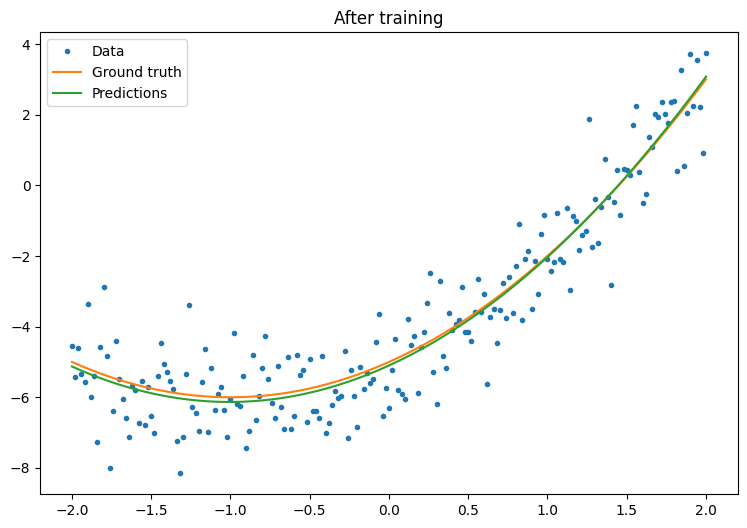

In [42]:
plot_preds(x, y, f, quad_model, 'After training')

In [45]:
new_model = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.stack([x, x**2], axis=1)),
    tf.keras.layers.Dense(units=1, kernel_initializer=tf.random.normal)])

In [46]:
new_model.compile(
    loss = tf.keras.losses.MSE,
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.01))

history = new_model.fit(x, y, 
                        epochs=100,
                        batch_size=32,
                        verbose=0)

new_model.save('./my_new_model.keras')

Text(0.5, 1.0, 'Keras training progress')

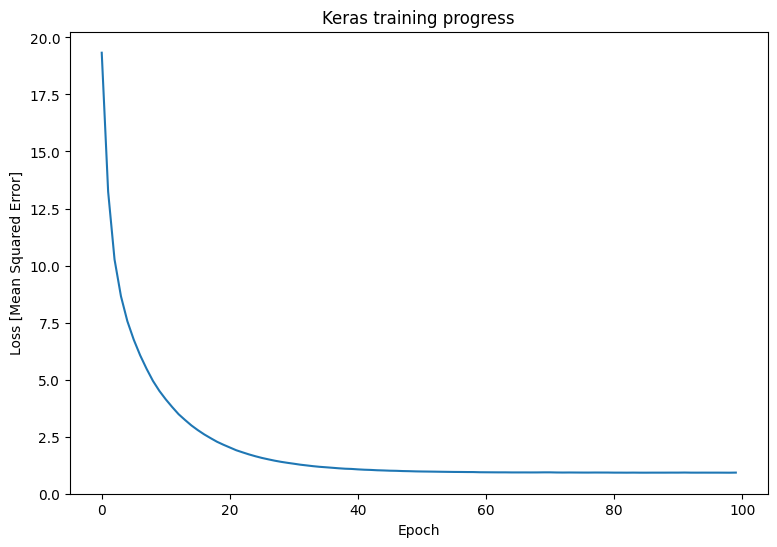

In [48]:
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylim([0, max(plt.ylim())])
plt.ylabel('Loss [Mean Squared Error]')
plt.title('Keras training progress')

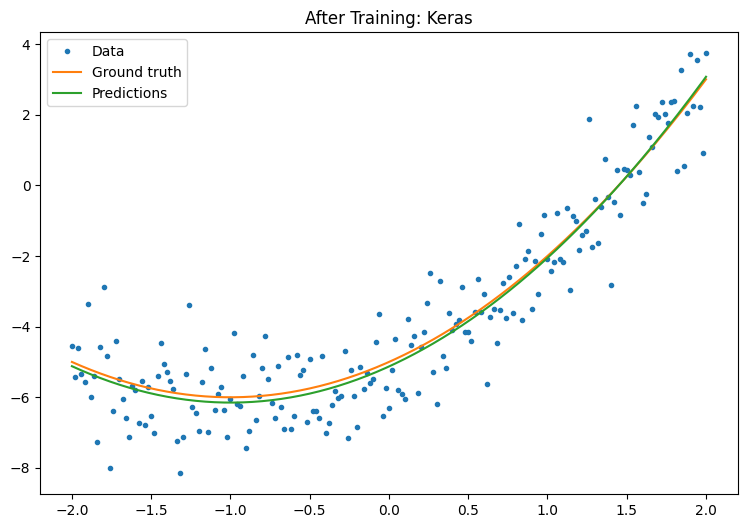

In [49]:
plot_preds(x, y, f, new_model, 'After Training: Keras')